# MSA 2025 Phase 2 - Part 1

In [10]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In this notebook, we will be going through dataset `W store sales`. Which includes 3 files of `features.csv`, `sales.csv`, and `stores.csv`.

## 1. Find all variables and understand them

We will go through the process of looking at the first 10 results of data for every csv, and maybe some further down in the data to get a better grasp at what's happening with the values.

Then use the `.describe()` function, to see if the key statistical values of `mean`, `max` etc. gives us useful clues to understanding the data.

In [ ]:
# read the sales.csv files
sales = pd.read_csv('sales.csv')

sales[:10], sales[80085:80090]

(   Store  Dept        Date  Weekly_Sales  IsHoliday
 0      1     1  2010-02-05      24924.50      False
 1      1     1  2010-02-12      46039.49       True
 2      1     1  2010-02-19      41595.55      False
 3      1     1  2010-02-26      19403.54      False
 4      1     1  2010-03-05      21827.90      False
 5      1     1  2010-03-12      21043.39      False
 6      1     1  2010-03-19      22136.64      False
 7      1     1  2010-03-26      26229.21      False
 8      1     1  2010-04-02      57258.43      False
 9      1     1  2010-04-09      42960.91      False,
        Store  Dept        Date  Weekly_Sales  IsHoliday
 80085      9    10  2012-10-19      13601.81      False
 80086      9    10  2012-10-26      13680.78      False
 80087      9    11  2010-02-05      12275.17      False
 80088      9    11  2010-02-12      11119.37       True
 80089      9    11  2010-02-19      11933.57      False)

In [20]:
# lets find key statistical values, just by sales.csv
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [43]:
# check sales datatype
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


### `sales.csv` findings

.csv file includes numerical floats, and a single date column, and a boolean column, indicating public holiday occurence in the week. It seems that the data is updated on a weekly basis (in addition to the giveaway of column `Weekly_Sales`). The data is only tracked within a finite period of time between `2010-02-05` to `2012-10-26` for all stores and its department.

With `.describe()`, it shows that the sales data includes 45 individual stores, and each of these stores have 99 departments. 45*99, should give about 4455 different weekly sales figures between `2010-02-05` and `2012-10-26`.

Weekly sales show the lowest sales made, contrasting to the highest sales made. It's clear that on average, every store makes a profit on a weekly basis, however variation on these profits vary widely.

In [33]:
# read the features.csv files
features = pd.read_csv('features.csv')

features[:10]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [37]:
# visualize a bit further down
features[6364:6374]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
6364,35,2013-06-21,70.76,3.626,3252.39,118.02,65.02,4722.43,10790.02,NaN,NaN,False
6365,35,2013-06-28,77.34,3.639,4764.55,85.65,NaN,4660.01,3274.82,NaN,NaN,False
6366,35,2013-07-05,77.41,3.614,6333.87,138.09,610.35,7224.45,728.00,NaN,NaN,False
6367,35,2013-07-12,80.74,3.614,4798.18,130.88,22.05,2351.60,15562.99,NaN,NaN,False
6368,35,2013-07-19,83.36,3.737,2318.53,122.30,23.45,771.35,1959.59,NaN,NaN,False
6369,35,2013-07-26,77.01,3.804,237.96,50.00,4.00,23.64,1059.83,NaN,NaN,False
6370,36,2010-02-05,45.97,2.545,NaN,NaN,NaN,NaN,NaN,209.852966,8.554,False
6371,36,2010-02-12,46.11,2.539,NaN,NaN,NaN,NaN,NaN,209.997021,8.554,True
6372,36,2010-02-19,45.66,2.472,NaN,NaN,NaN,NaN,NaN,210.045102,8.554,False
6373,36,2010-02-26,50.87,2.520,NaN,NaN,NaN,NaN,NaN,210.077189,8.554,False


In [38]:
# lets find key statistical values, just by features.csv
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [44]:
# check features data type
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


### `features.csv` findings

This .csv seems a bit interesting. There seems to be a lot of missing variables here. And what's noticeable is where `MarkDown 1-5` has values, `CPI` and `Unemployment` does not have values, and vice versa.

`Store` value range is the same with our `sales.csv` (1-45), and `Temperature` is most likely Fahrenheit, meaning data is from the USA. `Fuel_Price` is most likely indicated by $USD per gallon (based on temp assumption), and seems to have the right variation in price when compared to the US. `CPI` (Consumer Price Index), indicates change in prices of goods and services for the current store. Another way of indicating 'in/deflation levels' within the store. `Unemployment` might likely state the percent of customers from a particular store, are of unemployed persons (given unemployment rate is different between the first week of `Store 1`, to `Store 36`).

Seems `Store`, `Temperature`, and `Fuel_Price` have no null values, while `CPI` and `Unemployment` have nulls, though they seem to be inextricably tied by way of variables. Aka, if `CPI` has null values, then `Unemployment` will be null too. `MarkDown 1-5` has similar relationships, yet are missing a lot more values, and some MarkDown has more nulls than others. They have a large variation in values in `.describe()`, which makes it confusing as to what they're supposed to represent, or if they're related. They are also very undescriptive by itself, so it's hard to gauge on these 5 column's importance.

In [46]:
# read the stores.csv files
stores = pd.read_csv('stores.csv')

stores[:10], stores[20:25]

(   Store Type    Size
 0      1    A  151315
 1      2    A  202307
 2      3    B   37392
 3      4    A  205863
 4      5    B   34875
 5      6    A  202505
 6      7    B   70713
 7      8    A  155078
 8      9    B  125833
 9     10    B  126512,
     Store Type    Size
 20     21    B  140167
 21     22    B  119557
 22     23    B  114533
 23     24    A  203819
 24     25    B  128107)

In [47]:
# lets find key statistical values, just by features.csv
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [48]:
# check features data type
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


### `stores.csv` findings

.csv covers all stores 1-45, but each store are given a `Type` of store, ranging from A to C. Data also gives a `Size`, which likely indicates the size of the store by some arbitrary unit. Could be square feet of store space, or the number of individuals who have a membership at each branch. However, either options are unlikely, as >200k members in a singular store couldn't handle that many patrons, and an average grocery store size is ~40,000 square feet, which is close to `Size` minimum.

## 2. Clean data

### Check our null values
Because the datasets are so big, with so many null values, let's first identify all the nulls in each 3 data files.

In [54]:
# Check null values in all 3 files
sales.isnull().sum(), features.isnull().sum(), stores.isnull().sum()

(Store           0
 Dept            0
 Date            0
 Weekly_Sales    0
 IsHoliday       0
 dtype: int64,
 Store              0
 Date               0
 Temperature        0
 Fuel_Price         0
 MarkDown1       4158
 MarkDown2       5269
 MarkDown3       4577
 MarkDown4       4726
 MarkDown5       4140
 CPI              585
 Unemployment     585
 IsHoliday          0
 dtype: int64,
 Store    0
 Type     0
 Size     0
 dtype: int64)

`sales` and `stores` csv have no nulls, while features has many, and its back to the same culprit of columns.

Let's remove all null values from `features` and see what happens

In [60]:
nonull_features = features.dropna()
nonull_features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
92,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False
93,1,2011-11-18,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,False
94,1,2011-11-25,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True
95,1,2011-12-02,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False
96,1,2011-12-09,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8168,45,2013-03-01,39.72,3.890,6614.32,147.82,5.60,27.55,1668.95,193.122173,8.625,False
8169,45,2013-03-08,36.13,3.860,16382.54,88.67,34.62,3096.92,3486.91,193.211524,8.625,False
8173,45,2013-04-05,43.94,3.763,16427.83,5341.41,182.59,1523.83,1743.09,193.516047,8.335,False
8174,45,2013-04-12,57.39,3.724,8760.15,1713.11,21.08,1302.31,1380.74,193.589304,8.335,False


The data now keeps about 2000, from the ~8000 datapoints. My hypothesis of 'markdown not existing with CPI and Unemployment' is wrong as well.

Despite having all values together, it still doesn't give me any clues as to what `Markdown1-5` represents in the data. Despite having the same name, checking `.describe()`, their range of values are vastly different from each other, making it hard to link them together as a cohesive data point. So in this case, I will remove them, and apply the `.dropna()` on CPI and Unemployment. As they can be good indication to profit trends for store sales.

In [61]:
features = features.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis=1)

In [63]:
clean_features = features.dropna()
clean_features

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False
...,...,...,...,...,...,...,...
8172,45,2013-03-29,40.68,3.784,193.442790,8.625,False
8173,45,2013-04-05,43.94,3.763,193.516047,8.335,False
8174,45,2013-04-12,57.39,3.724,193.589304,8.335,False
8175,45,2013-04-19,56.27,3.676,193.589304,8.335,False


### department columns

I visually scrolled through the `sales.csv` on `Notepad++` to get a better understanding of why the file is so damn big. Each store seems to have departments 1 to 99, which is again undescriptive like markdown, but at least we can make an educated guess of it being like a category of item being sold within the store. Or aisle numbering. It's not feasible to visualize all 1 to 99 departments, from all 45 stores in a reasonable manner. 

So we'll sum up all department earnings into a weekly total earning for every store.

In [69]:
# sum up all sales from department, into a total for each store, per week
sales['Date'] = pd.to_datetime(sales['Date'])

store_sales = sales.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()

store_sales

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68
...,...,...,...
6430,45,2012-09-28,713173.95
6431,45,2012-10-05,733455.07
6432,45,2012-10-12,734464.36
6433,45,2012-10-19,718125.53


This new data frame doesn't include holiday column, which is fine. Since our `features.csv` includes that column for us, and I want to aim to combine these two columns together.

### aligning date column

`store_sales` and `features` both have date columns, but the period of time that these data were tracked, are different from each other. So we'll need to figure out where the dates overlap, and chop off the parts that aren't. As all remaining columns may be crucial to finding store sale patterns.

Let's check the date min max.

In [70]:
# check the date min max on store_sales

store_sales['Date'].min(), store_sales['Date'].max()

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

In [72]:
# check features dates

features['Date'] = pd.to_datetime(features['Date']) # convert date column to date object
features['Date'].min(), features['Date'].max()

(Timestamp('2010-02-05 00:00:00'), Timestamp('2013-07-26 00:00:00'))

Seems like `features` have further recorded dates beyond our `store_sales`. What we can do, is move the excess to a new data frame for possible ML model prediction purposes, rather than discarding it entirely, while migrating sales data into `features`.

In [76]:
# cut off features data beyond 2012-10-26

only_features = features[features['Date'] > '2012-10-26']

features = features[features['Date'] <= '2012-10-26']

In [77]:
features

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False
...,...,...,...,...,...,...,...
8146,45,2012-09-28,64.88,3.997,192.013558,8.684,False
8147,45,2012-10-05,64.89,3.985,192.170412,8.667,False
8148,45,2012-10-12,54.47,4.000,192.327265,8.667,False
8149,45,2012-10-19,56.47,3.969,192.330854,8.667,False


Sweet. Our `features` and `store_sales` have the same number of rows (6435), meaning there aren't any missing dates between the two datasets. Let's append sales column into features, and discard `store_sales`, as the other column data is present inside `features`.

In [78]:
# append store_sales['Weekly_Sales'] into features

features = features.reset_index(drop=True) # reset index value, so both data frames match up for appending

features['Weekly_Sales'] = store_sales['Weekly_Sales']

features

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,1643690.90
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,1641957.44
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,1611968.17
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,1409727.59
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,64.88,3.997,192.013558,8.684,False,713173.95
6431,45,2012-10-05,64.89,3.985,192.170412,8.667,False,733455.07
6432,45,2012-10-12,54.47,4.000,192.327265,8.667,False,734464.36
6433,45,2012-10-19,56.47,3.969,192.330854,8.667,False,718125.53


In [80]:
stores[:5]

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


### Immutable data

`stores` is an interesting one, where it states the qualities of stores 1 to 45, rather than stating the values that changes from week to week. Column `Type` is again inspecific. Could mean socio-economic region, store age, or profit target achievement rate. But I figure ML models may be able to figure out what categorizes each stores from A to C, based on relevant information from `features` and sales figure. 

It's still important information that can help with sales prediction, so we will add both `Type` and `Size` into `features`, wherever the store's number matches with it's parent store number.

In [97]:
# appending stores data frame onto features, by the store number

store_sales = pd.merge(stores, features, on='Store', how='left') # merge on `store` column, and to the `left` of all columns (except `Store`)

store_sales

,Store,Type,Size,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales
0,1,A,151315,2010-02-05,42.31,2.572,211.096358,8.106,False,1643690.90
1,1,A,151315,2010-02-12,38.51,2.548,211.242170,8.106,True,1641957.44
2,1,A,151315,2010-02-19,39.93,2.514,211.289143,8.106,False,1611968.17
3,1,A,151315,2010-02-26,46.63,2.561,211.319643,8.106,False,1409727.59
4,1,A,151315,2010-03-05,46.50,2.625,211.350143,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...
6430,45,B,118221,2012-09-28,64.88,3.997,192.013558,8.684,False,713173.95
6431,45,B,118221,2012-10-05,64.89,3.985,192.170412,8.667,False,733455.07
6432,45,B,118221,2012-10-12,54.47,4.000,192.327265,8.667,False,734464.36
6433,45,B,118221,2012-10-19,56.47,3.969,192.330854,8.667,False,718125.53


## 3. Visualise data

### Box plot and histogram to check sales

We'll create two separate graphs, historgram and box plot to gauge on how sales are doing for all 45 stores. This also gives us a chance to see if there are any possible outliers in our data.

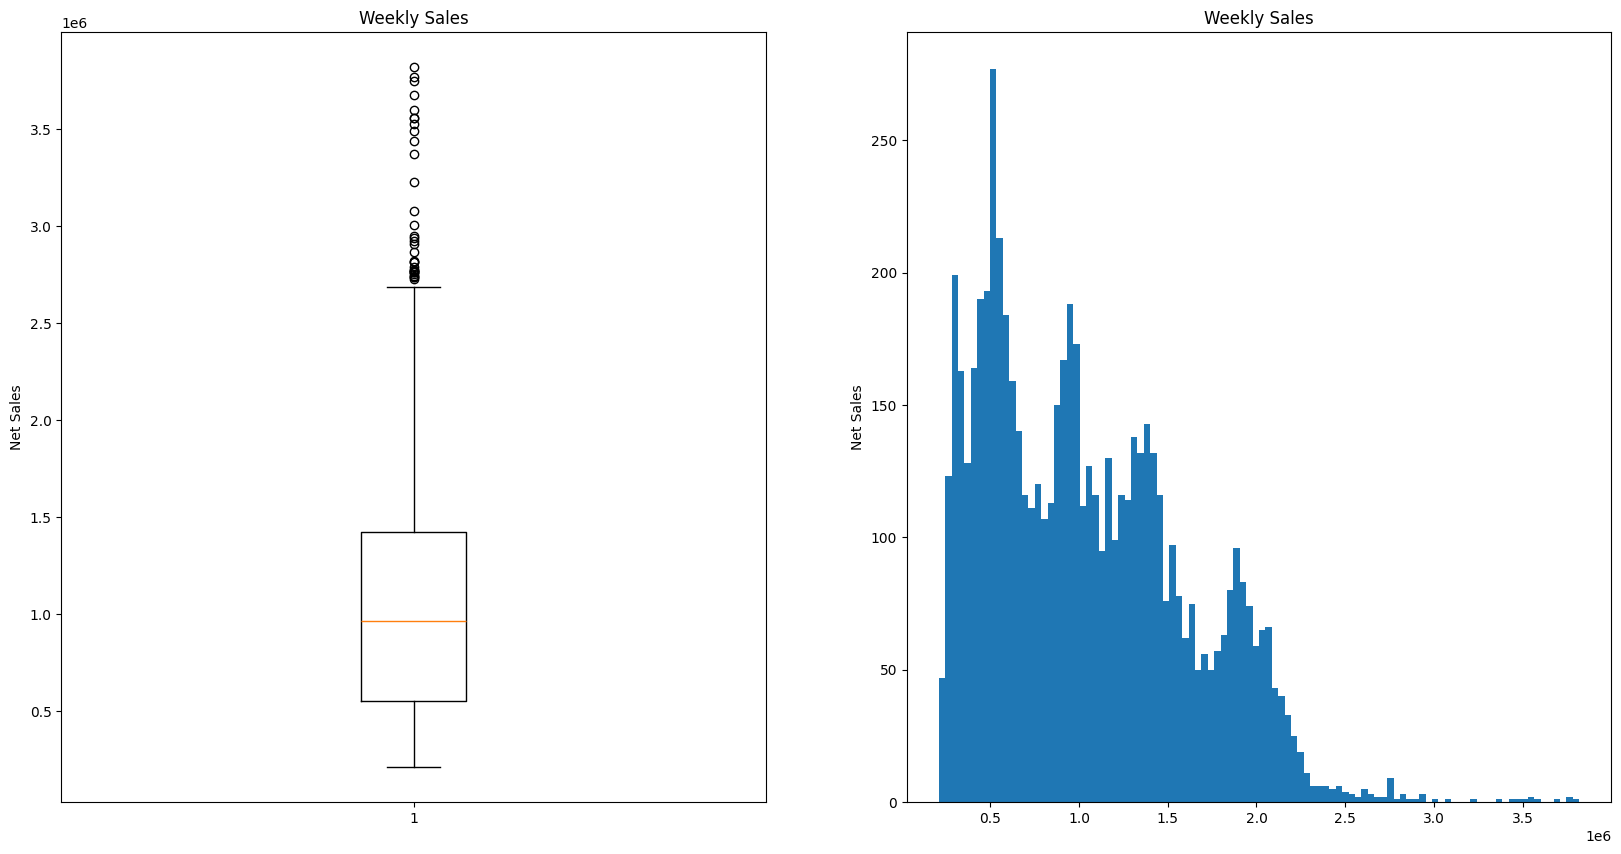

In [ ]:
# create a histogram and box plot on weekly sales data
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10)) # ncols > number of columns for our graph, figsize > figure size for graphs

# add title and label to graphs
ax1.set(title='Weekly Sales', ylabel='Net Sales')
ax2.set(title='Weekly Sales', ylabel='Net Sales')

# plot our two graphs
ax1.boxplot(store_sales['Weekly_Sales'])
ax2.hist(store_sales['Weekly_Sales'], bins=100); # bins > how many singular bars the graph will use

# ; > prevents random code/information from appearing above our graphs


It seems our two graphs are quite populated evenly. Box and whisker graph, shows how the `upper quartile` whisker reaches around `2.6 1e6`, with the max value reaching >`3.6 1e6`.

Histogram shows some amount of clustering at certain amount of it's sales. A bit of an anomaly, but likely can be from the 'immutable' details of the store of `Type` and `Size`. Where it's typical to assume that a bigger sized store, will achieve higher sales. Or vice versa for a smaller store. So these are likely typical weekly sales data of certain stores or store type, and that these store often have a consistent rate of weekly sales.

The way the weekly sales values are distributed across both graph, leads me to believe that there aren't outliers in our data frame. With some of the max values outside of the whiskers, other factors can suddenly make weekly sales peak, e.g. a virus pandemic or holiday periods.

### Check total sales by store, and size by store

I want to do a rudimentary visual comparison between sales of the store, to the size of the store. We will use a bar graph to plot x axis from store 1 to 54, with y being the sales/size.

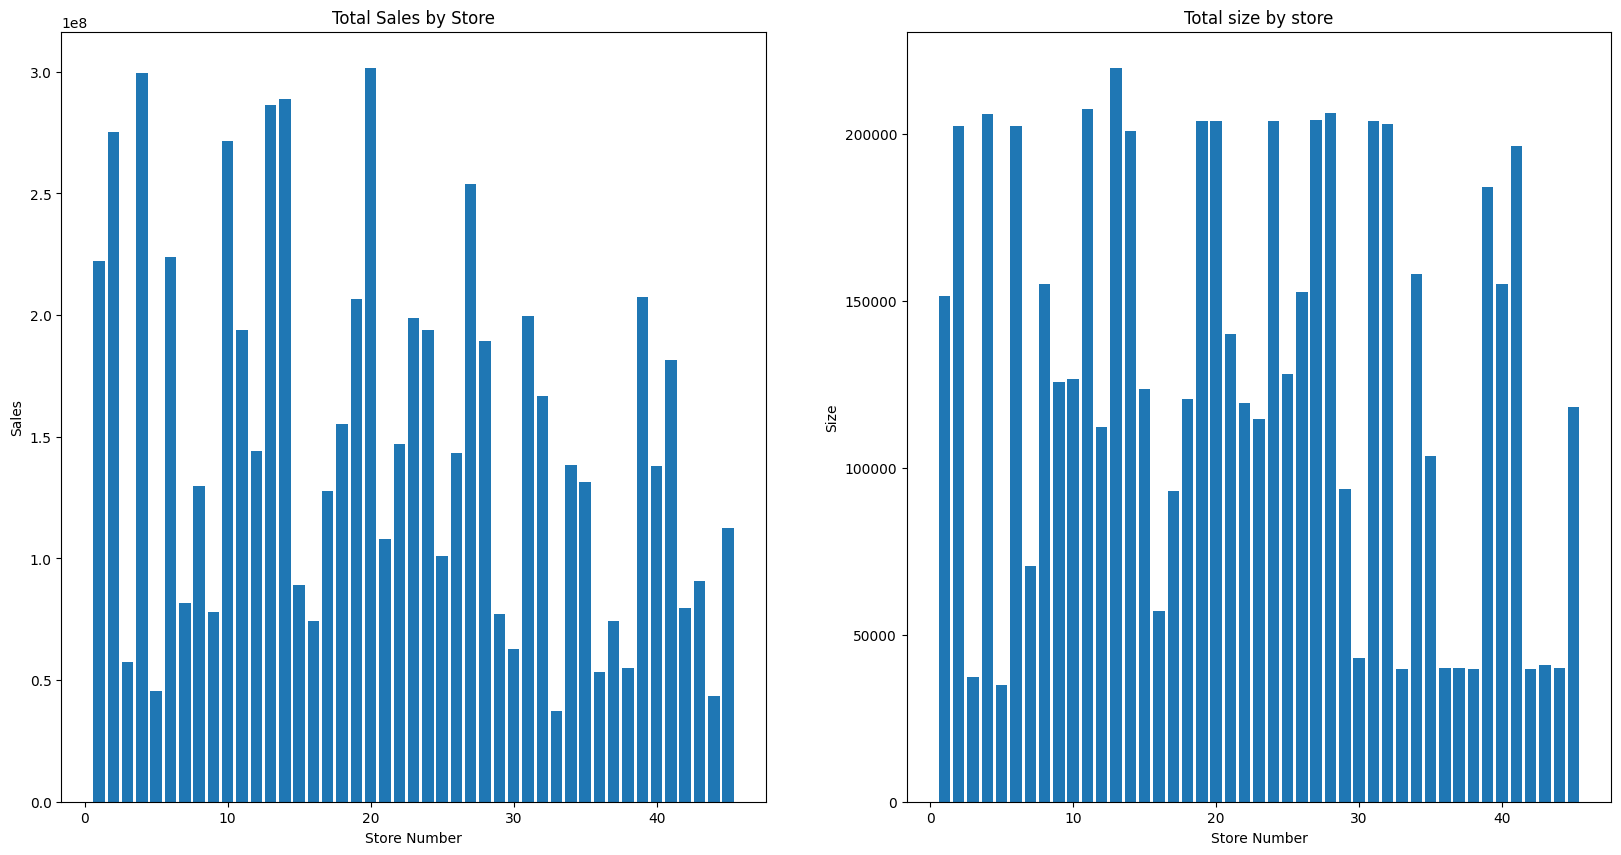

In [ ]:
# create two bar graphs, that show total sales of a store, and size of store
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))

total_sales = store_sales.groupby('Store')['Weekly_Sales'].sum() # grouping rows by column 'store', while summing up 'weekly_sales' for every group.
size = store_sales.set_index('Store')['Size'] # method to set index of each store, by the size value

ax1.bar(total_sales.index, total_sales.values+1)
ax1.set(title='Total Sales by Store', ylabel='Sales', xlabel='Store Number')

ax2.bar(size.index, size.values+1)
ax2.set(title='Total size by store', ylabel='Size', xlabel='Store Number');

When carefully pin pointing the tall bars from the low bars, and how far away they are from neighbouring tall and low bars, there's a correlation between the size of a store, and the total amount of profit they made. This logically makes sense, with the increase in shop size, there's an increase in the capabilities to accomodate more goods and services within the shop, generating more sales.

There's somewhat of a range as to how big or small a store can get. Likely standardized by other means like zoning laws or construction/profit/managerial feasibility. Store 13 is slightly a little above typical max size, but is not egrigious to the point, where we may consider it as an outlier.

We can also clearly see a trend of how store sales diminish, the larger the store number is. Despite store numbers near the latter end of the graph, having comparable sizes to the largest stores already, a likely reasoning behind this is the larger numbered stores are actually newer branches that just opened up, where competition is fierce for a new store that not many people are yet acquainted with. While the lower numbered stores have been in the area for quite some time, and is well established within local communities to do their shopping in. 

### Colour code store type into total sales and size graph
I want to see what colour coding can tell us about `Type` inside `store_sales` on the previous two graphs, as it is quite ambiguous so far.

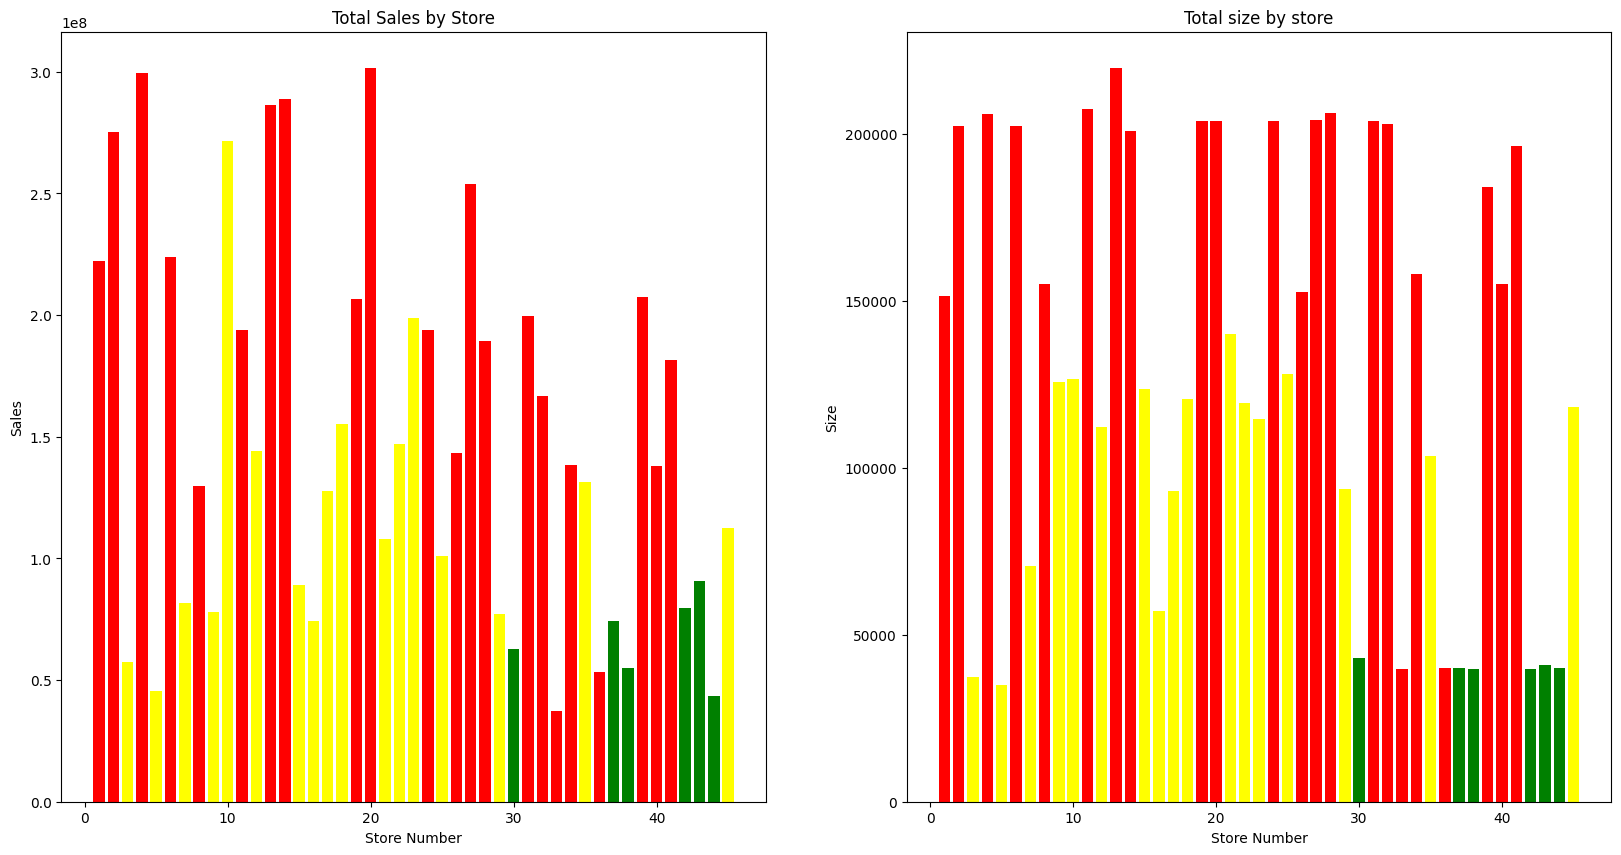

In [ ]:
# colour code type onto our previous two graphs
colour_map = {'A':'red','B':'yellow','C':'green'} # create a dictionary, where each type letter is connected to a specific colour
type = store_sales.set_index('Store')['Type']

df = store_sales.groupby('Store').agg({ # code specifically for our sales bar graph. Must use .groupby on `type` to get indexing correct to apply colour mapping
    'Weekly_Sales': 'sum',
    'Type': 'first'  # assumes one type per store
}).reset_index()

colourss = df['Type'].map(colour_map) # for sales bar graph
colours = type.map(colour_map) # for size bar graph

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))

ax1.bar(df['Store'], df['Weekly_Sales'], color=colourss)
ax1.set(title='Total Sales by Store', ylabel='Sales', xlabel='Store Number')

ax2.bar(size.index, size.values+1, color=colours)
ax2.set(title='Total size by store', ylabel='Size', xlabel='Store Number');


The code is a bit messy, due to `.groupby` and `.set_index` functions. The output data are missaligned between each other. So the type data will need a `groupby` and `set_index` version, to suit either of the two graphs successfully.

Now observation wise, there's a clear pattern for the type data, being aligned with store size, rather than total sales by store. Type most likely indicates the 'size' of the store. Categorizing in 'Large', 'Medium', and 'Small'. There's an asterisk for small however, where the 2 stores towards the lower store number, has similar sizing to the other green, but yet is not green itself, but yellow. But there's another 2 at the latter end, with red.

I hypothesise that, the small, medium, and large typing wasn't fully established, and was probably initially labeled as either 'big' or 'not big', therefore only needing `A` and `B`. It was only later after opening a number of different branches, was the `C` implemented (representing the green), specifically for the smaller stores only. While `B` is displayed as for the medium sized branches.

For the two red columns, I have little idea what it could be. Maybe it was planned to be store type `A`, where it's big, but had to be downsized due to third party issues. Or maybe socio-economic area, where bigger stores do better with richer neighbourhoods maybe. However the way type's category is applied over store size, seems like it perfectly has a cutoff point, as to what constitutes type `A`, `B`, or `C`. Could even be human error, as this was a period of time, when `C` type was recently introduced as well.

## 2.5 Data cleaning xtras

### Data change of type for stores

I'd figure it's good practice to update the `Type` of the stores, that used a legacy system of the typing system (A and B) when compared to the newer sytem (A, B, and C). Namely recategorizing stores 3 and 5 from `B` to `C`. That way it represents the data more accurately with what it is at its latest point, and should cause less confusion when model training.

I'll also change the two red stores from `A` to `C`, to match my biased thinking of small stores being type `C`, based on how you can visually see on the graph, that a defined store size makes it  `A`, `B`, or `C`.

In [ ]:
# change type for stores
store_sales.loc[store_sales['Store'] == 3, 'Type'] = 'C' # locating store '3', then make type = C
store_sales.loc[store_sales['Store'] == 5, 'Type'] = 'C'
store_sales.loc[store_sales['Store'] == 33, 'Type'] = 'C'
store_sales.loc[store_sales['Store'] == 36, 'Type'] = 'C'

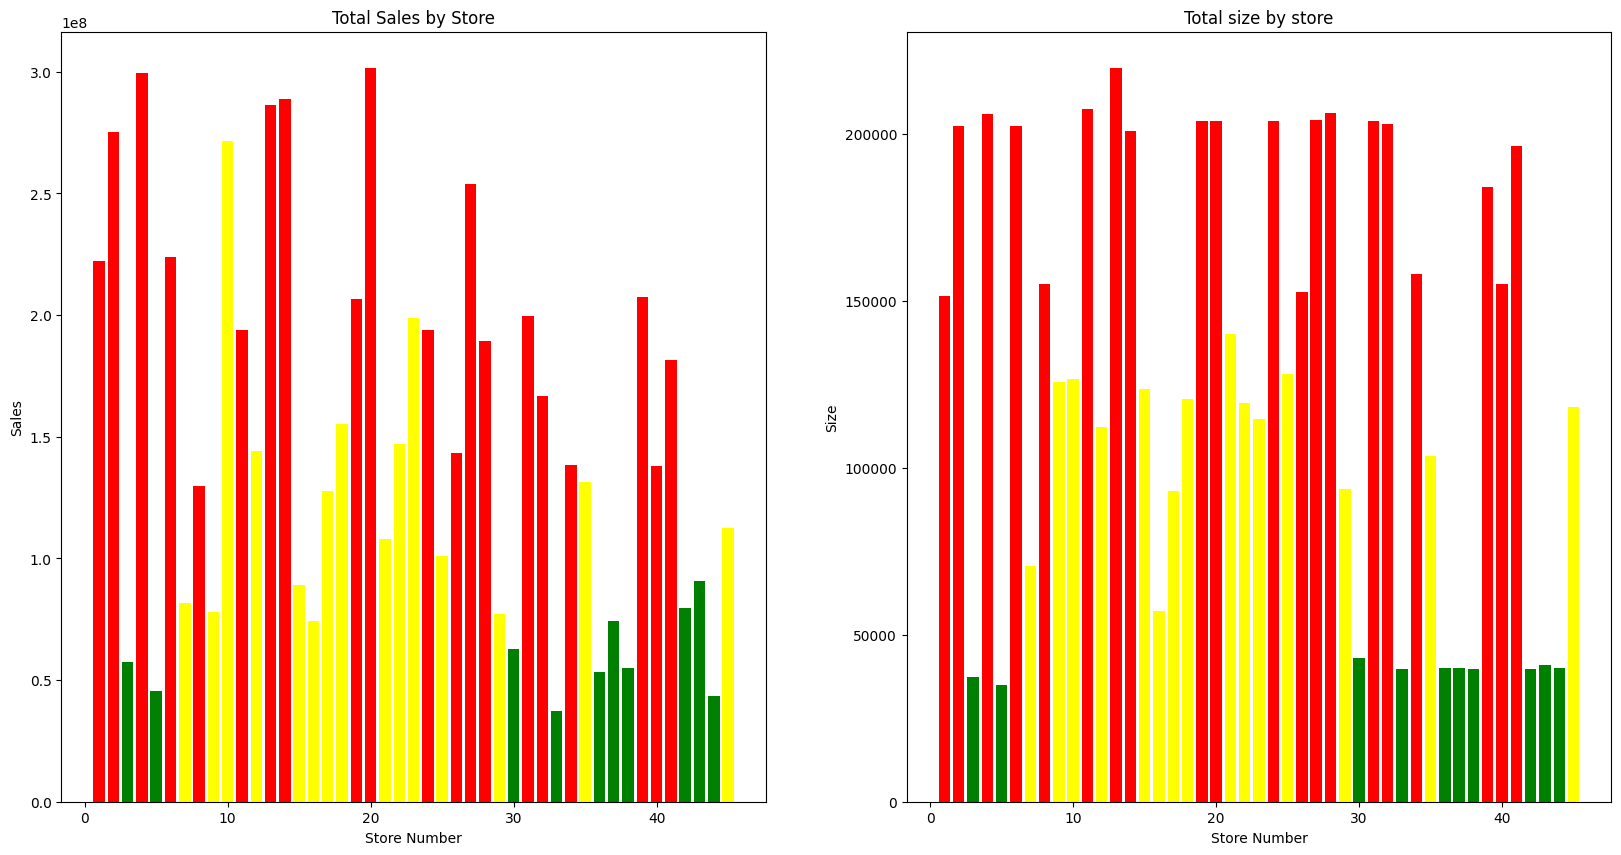

In [128]:
# reprint graph again
# colour code type onto our previous two graphs
colour_map = {'A':'red','B':'yellow','C':'green'} # create a dictionary, where each type letter is connected to a specific colour
type = store_sales.set_index('Store')['Type']

df = store_sales.groupby('Store').agg({ # code specifically for our sales bar graph. Must use .groupby on `type` to get indexing correct to apply colour mapping
    'Weekly_Sales': 'sum',
    'Type': 'first'  # assumes one type per store
}).reset_index()

colourss = df['Type'].map(colour_map) # for sales bar graph
colours = type.map(colour_map) # for size bar graph

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))

ax1.bar(df['Store'], df['Weekly_Sales'], color=colourss)
ax1.set(title='Total Sales by Store', ylabel='Sales', xlabel='Store Number')

ax2.bar(size.index, size.values+1, color=colours)
ax2.set(title='Total size by store', ylabel='Size', xlabel='Store Number');


Now the `Type` data should represent well with it's current definition, as opposed to their binary system! (And maybe some human error, who really knows lol).

### One hot encoding
One thing with ML models, is they only do well with binary or numerical variables. String variables is something they don't really understand. So we will one-hot encode `type`.

In [131]:
# one hot encode `type`
sales_df = pd.get_dummies(store_sales, columns=['Type'])
sales_df

,Store,Size,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales,Type_A,Type_B,Type_C
0,1,151315,2010-02-05,42.31,2.572,211.096358,8.106,False,1643690.90,True,False,False
1,1,151315,2010-02-12,38.51,2.548,211.242170,8.106,True,1641957.44,True,False,False
2,1,151315,2010-02-19,39.93,2.514,211.289143,8.106,False,1611968.17,True,False,False
3,1,151315,2010-02-26,46.63,2.561,211.319643,8.106,False,1409727.59,True,False,False
4,1,151315,2010-03-05,46.50,2.625,211.350143,8.106,False,1554806.68,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,118221,2012-09-28,64.88,3.997,192.013558,8.684,False,713173.95,False,True,False
6431,45,118221,2012-10-05,64.89,3.985,192.170412,8.667,False,733455.07,False,True,False
6432,45,118221,2012-10-12,54.47,4.000,192.327265,8.667,False,734464.36,False,True,False
6433,45,118221,2012-10-19,56.47,3.969,192.330854,8.667,False,718125.53,False,True,False


## 4. Identify correlated variables

Let's correlate our columns, and see what kind of possible influence they may make to the sales.

Obviously, there will be some slight variations between every store when it comes to what generates them the most profit. Though it's not feasible to check every possible influence as of now. However, their mean/average should align close with each other. With the slight caveat of weaker influences from the newer stores, due to them having less sales per store unit size, when compared to the older branches.

Let's start with `Sales` to `Size`

In [132]:
# correlate sales to size
correlation = sales_df['Weekly_Sales'].corr(sales_df['Size'])
correlation

np.float64(0.810468494651372)

Correlation values are between -1 and 1. 1 where both columns are 100% correlated to each other, and -1 for columns being 100% uncorrelated.

A value of 0.81 means that the size is highly correlated to sales outcome.

We can do a correlation matrix, and see what effect all numerical variable has, to the sale's outcome.

In [135]:
# create correlation matrix with all numerical columns
numeric = sales_df[['Size','Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']]
correlation_matrix = numeric.corr()
correlation_matrix.loc['Weekly_Sales']

Size            0.810468
Temperature    -0.063810
Fuel_Price      0.009464
CPI            -0.072634
Unemployment   -0.106176
Weekly_Sales    1.000000
Name: Weekly_Sales, dtype: float64

It seems the rest of the numerical columns lack the effectivity of `Size`. 

1. There's some slight correlation to increased unemployment, to decreased sales. Likely due to a portion of the workforce, who don't have income to afford to go to these stores. 
2. Increase CPI to decreased sales, as high consumer price index, typical mean higher grocery price/unaffordability for the consumer. 
3. Increased temperature to decreased sales, could be due to the holiday periods often being in Summer where temperatures are warmer. This is the time when some people travel out of home, therefore aren't spending in stores.

### Feature selection

`Fuel_Prices` seems to have practically no influence to sales of the store. So it can be removed, due to offering no benefit to ML model, except taking up space/memory.

In [136]:
sales_df = sales_df.drop(['Fuel_Price'], axis=1)
sales_df

,Store,Size,Date,Temperature,CPI,Unemployment,IsHoliday,Weekly_Sales,Type_A,Type_B,Type_C
0,1,151315,2010-02-05,42.31,211.096358,8.106,False,1643690.90,True,False,False
1,1,151315,2010-02-12,38.51,211.242170,8.106,True,1641957.44,True,False,False
2,1,151315,2010-02-19,39.93,211.289143,8.106,False,1611968.17,True,False,False
3,1,151315,2010-02-26,46.63,211.319643,8.106,False,1409727.59,True,False,False
4,1,151315,2010-03-05,46.50,211.350143,8.106,False,1554806.68,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,118221,2012-09-28,64.88,192.013558,8.684,False,713173.95,False,True,False
6431,45,118221,2012-10-05,64.89,192.170412,8.667,False,733455.07,False,True,False
6432,45,118221,2012-10-12,54.47,192.327265,8.667,False,734464.36,False,True,False
6433,45,118221,2012-10-19,56.47,192.330854,8.667,False,718125.53,False,True,False


Lastly, I wanted to see if there's a change in sales, depending if the week had public holidays or not.

What I'll do is find the mean of sales for all `IsHoliday` thats `False`, then another for `True`.

In [137]:
holiday_sales = sales_df.groupby('IsHoliday')['Weekly_Sales'].mean()
holiday_sales

IsHoliday
False    1.041256e+06
True     1.122888e+06
Name: Weekly_Sales, dtype: float64

It appears that there's a slight uptake in sales when a holiday has occured in the week, compared to non holiday weeks.

## 5. Summary

### Steps taken for EDA

`1. Loading and Understanding Data`: Importing all data files, and then printing out the dataframe, to better understand numeric/column variables.

`2. Data Cleaning`: Removing rows with any null values, or columns with no description as to the info its trying to provide. Also removing extra date info, that don't have sales, which is our main focus column.

`3. Combine Dataframe`: Combine the 3 separate dataframes together, so it's ready for ML training/easier to read in one place.

`4. Data Visualization`: Looking at numeric and categorical colummns in graph form, to see if there are interesting patterns on sales, what tyep column means, or possible outliers.

`5. Data Adjustment`: Adjusting a few individual type column's value to match what was observed from data visualization, and what I think it's meant to represent.

`6. One Hot Encoding`: Type column is one hot encoded, so ML training will be able to train on the data frame.

`7. Correlation Analysis`: Looking at correlation of all numeric values to the 'weekly sales' column.

`8. Feature Selection`: Using the correlation information, to remove 'fuel' price as it provided the least amount of correlation to 'weekly sales'.

### Interesting findings during EDA

`1. Data can be undescriptive`: Required some educational guesses with some of the columns, e.g. department and type. MarkDown 1-5 columns were especially confusing, with so many randomly missing values, and seems as if they're operating differently from each other. So has been removed from data frame due to too many unknown variables.

`2. Consistent store sales`: Looking at all weekly sales from all stores through box and whisker/histogram, often had minimal variation in weekly sales, which explains why certain parts of histogram starts bunching up. As stores often achieve a constant weekly sales, that keep them in the same range.

`3. Store sales diminish, as store number increases`: E.g. store 1 often have higher profits than store 40, despite similar store size. It likely indicates that stores with higher numbers are newer stores, where stores aren't yet established in the neighbourhood. But vice versa for low numbers, where it had time to integrate with the community.

`4. Type column likely indicate store size, and are adjusted`: Type has A, B, and C. When colour categorizing it over store size, it shows a pattern of large, medium, and small on the bar graph. A few 'C's didn't align too well, so I've adjusted to fit my observation. With reasoning being 'legacy type categorizing' and 'possible human error'.